# Read data 

In [1]:
import numpy as np
from os.path import join
import pandas as pd

# read the dataframe
df = pd.read_csv(join('data', 'data.csv'), sep=",", decimal=".", quotechar='"')

# drop duplicates to avoid the over-representation of the same image
# we do this because the results obtained for machines on the same condition are very similar,
# so this is a conservative decision, although it is theoretically still valid not do it
only_uniques = True


# Filters

In [2]:
# drop duplicates to avoid the over-representation of the same image
# we do this because the results obtained for machines on the same condition are very similar,
# so this is a conservative decision, although it is theoretically still valid not do it
if only_uniques:
    df = df.drop_duplicates(['engine', 'image_id', 'browser', 'region', 'wave', 'query'])

# only analize those with one face
df = df[(df['has_faces'] == 1)].sort_values('engine')

df.shape

(21148, 20)

# Figure 1

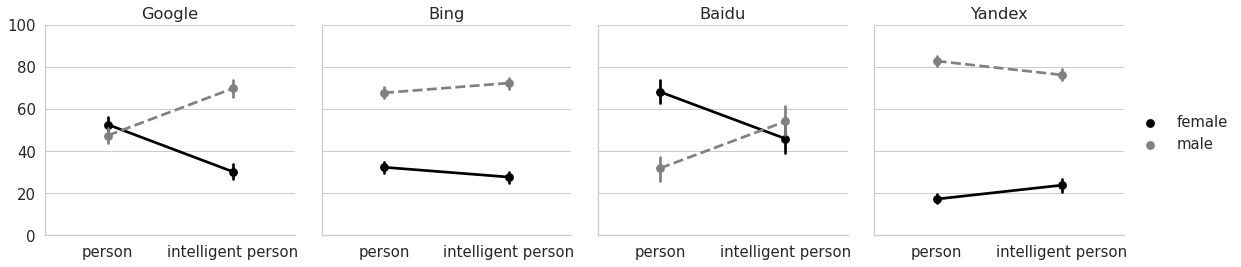

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# seaborn template
sns.set(style="whitegrid", font_scale=1.35)

# response variable of the plot
resp = 'has_faces' 

# for the query person and intelligent person
toplot_binary = df[(df['query_type'] == 'person') ]

# transform the data to the long format so that it can be plotted in seaborn
# the columns to be transformed are has_faces_female and has_faces_male, as 
# indicated by the variable resp
toplot_binary = pd.wide_to_long(toplot_binary.reset_index()[[
    'index', 'browser', 'region', 'engine', 'query', 'image_id', f'{resp}_male', f'{resp}_female', 'faceism']], 
    stubnames=f'{resp}_',i=['index', 'browser', 'region', 'engine', 'image_id'], j='gender', sep='', suffix='.+').reset_index(
).rename(columns={f'{resp}_': f'{resp}'})

# transform to percentages
toplot_binary[resp] = toplot_binary[resp] * 100

# define the grid by setting the engine as columns, and setting the order
g = sns.FacetGrid(toplot_binary, 
                  col="engine", 
                  height=4,
                  ylim=(0,100),
                  col_order = ['Google', 'Bing', 'Baidu', 'Yandex'])

# set the axes, including the order and colors
g.map_dataframe(sns.pointplot, 
                x="query", 
                y=f"{resp}", 
                hue='gender', 
                style='gender', 
                order=['person', 'intelligent person'], 
                linestyles=["-", "--"],
                hue_order=['female', 'male'], 
                style_order=['female', 'male'],
                palette = ['black', 'gray']
               )

# add the legend and labels
g.add_legend()
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

# save the figure in eps
plt.savefig('figures/FIGURE_1.eps')


# Figure 2

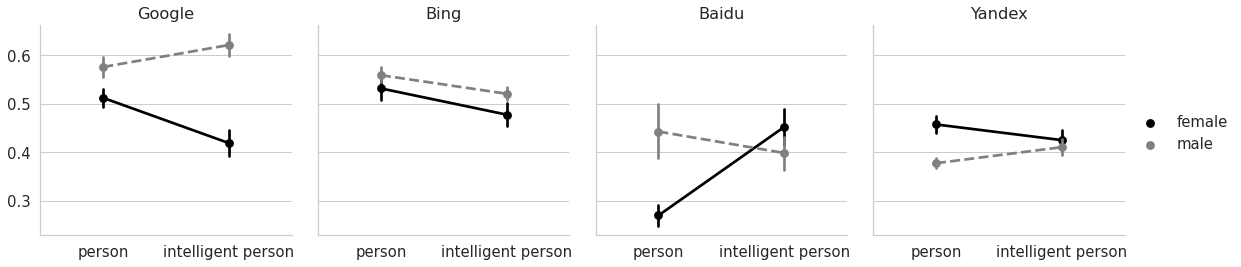

In [4]:
# filter the data for the query person exclusively
toplot_freq = df[(df['query_type'] == 'person')].copy()

# pretty lables for the plot
toplot_freq['gender'] = toplot_freq['has_faces_male'].replace({1:'male', 0:'female'})

# define the grid by setting the engine as columns, and setting the order
g = sns.FacetGrid(toplot_freq,
                  col="engine",  
                  height=4,
                  col_order = ['Google', 'Bing', 'Baidu', 'Yandex'])

# set the axes, including the order and colors
g.map_dataframe(sns.pointplot,
                x="query", 
                y=f"faceism", 
                order=['person', 'intelligent person'],
                hue_order=['female', 'male'], 
                hue='gender',
                linestyles=["-", "--"],
                style_order=['female', 'male'],
                palette = ['black', 'gray']
               
)

# add the legend and labels
g.add_legend()
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')


# save the figure in eps
plt.savefig('figures/FIGURE_2.eps')

# Figure 3

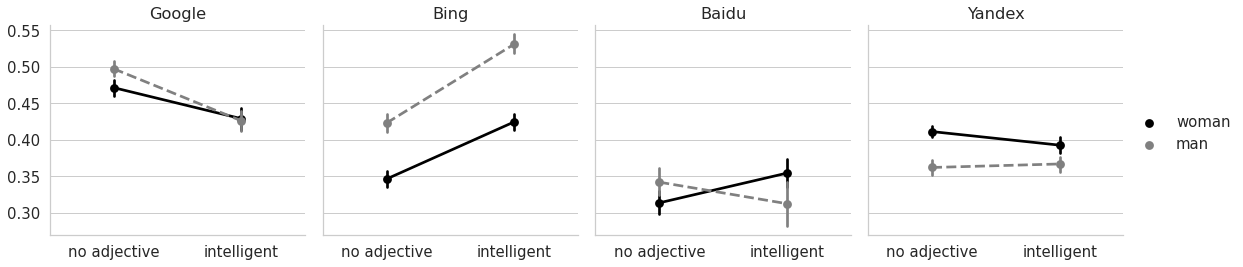

In [5]:
# filterd by the gendered query, i.e. man or woman
toplot = df[(df['query_type'] != 'person')].copy()

# define the faces that match the query for male and female
male_match = (toplot['query_type'] == 'man') & (toplot['has_faces_male'])
female_match = (toplot['query_type'] == 'woman') & (toplot['has_faces_female'])

# define the ones that are actually matches (i.e., the ones corresponding to the query)
toplot['is_a_match'] = male_match | female_match
toplot = toplot[toplot['is_a_match']]


# define the grid by setting the engine as columns, and setting the order
g = sns.FacetGrid(toplot,
                  col="engine",
                  height=4,
                  col_order = ['Google', 'Bing', 'Baidu', 'Yandex']
                 )

# set the axes, including the order and colors
g.map_dataframe(sns.pointplot, 
                x="query_adjective", 
                y=f"faceism", 
                hue='query_type', 
                hue_order=['woman', 'man'], 
                order=['no adjective', 'intelligent'],
                linestyles=["-", "--"],
                style_order=['female', 'male'],
                palette = ['black', 'gray']
               )

# add the legend and labels
g.add_legend()
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

# save the figure in eps
plt.savefig('figures/FIGURE_3.eps')